15035 instances loaded from /home/jovyan/work/kaggle_kakr_housing/data/train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode      

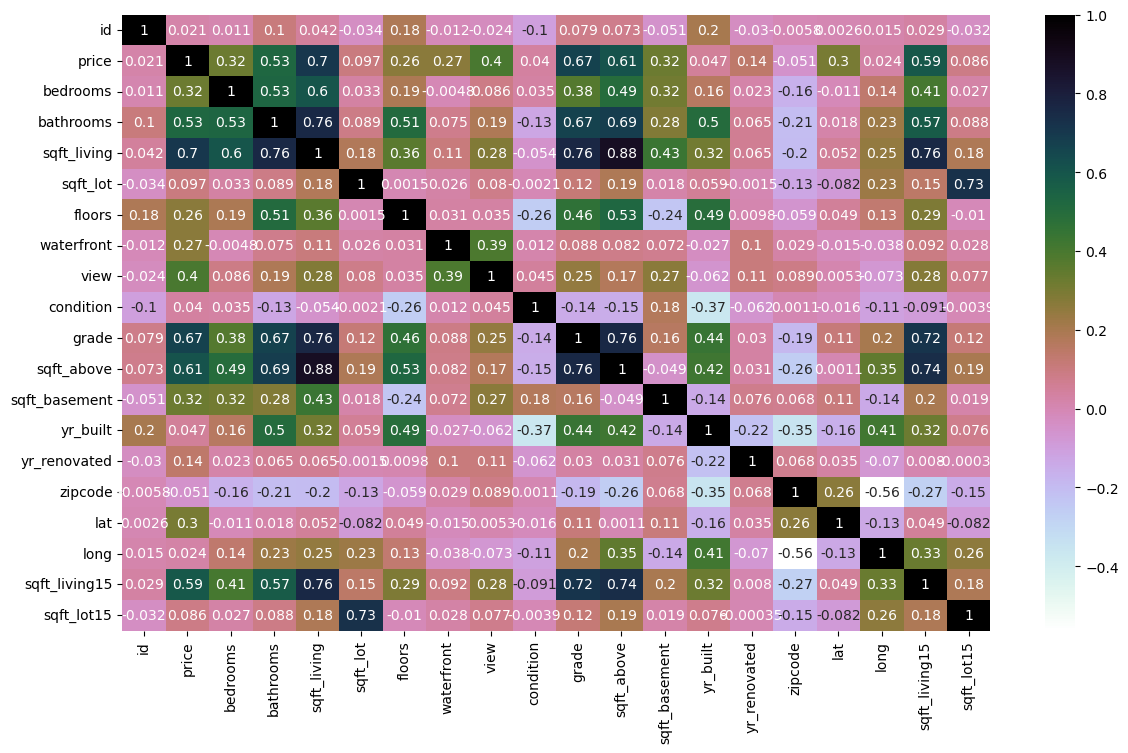

In [77]:
# 1. 라이브러리 임포트
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# 2. MyRegressionTool 클래스 정의
class MyRegressionTool:
    df = 0

    def read(self, fn):
        imsi = pd.read_csv(fn)
        print(len(imsi), 'instances loaded from', fn)
        
        # id 제거, date는 앞 8자리만 남김
     
        imsi['date'] = imsi['date'].apply(lambda x: str(x)[:8])
        
        self.df = imsi

    def show(self):
        print(self.df.info())
        print(self.df.head(5))

    def count_unique(self):
        for column in self.df:
            print(column, ':', self.df[column].nunique())

    def unique(self, col):
        return self.df[col].unique()

    def ignore_warning(self):
        import warnings
        warnings.filterwarnings('ignore')

    def pairplot_all(self, cols, h): 
        plt.figure(figsize=(10,6))
        sns.plotting_context('notebook', font_scale=1.2)
        g = sns.pairplot(self.df[cols], hue=h, height=2)
        g.set(xticklabels=[])

    def pairplot_single(self, x_, y_, h_):
        sns.lmplot(x=x_, y=y_, hue=h_, data=self.df, fit_reg=False)

    def heatmap(self, cols='all'):
        if cols == 'all':
            plt.figure(figsize=(14,8)) 
            numeric_df = self.df.select_dtypes(include=['number'])  # 숫자형만
            sns.heatmap(numeric_df.corr(), annot=True, cmap='cubehelix_r')
            plt.show()
        else:
            plt.figure(figsize=(15,10))
            sns.heatmap(self.df[cols].corr(), annot=True)
            plt.show()

    def boxplot(self, x_col, y_col):
        f, sub = plt.subplots(1, 1, figsize=(12.18,5))
        sns.boxplot(x=self.df[x_col], y=self.df[y_col], ax=sub)
        sub.set(xlabel=x_col, ylabel=y_col)
        plt.show()

    def plot_3d(self, a, b, c):
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(1, 1, 1, projection="3d")
        ax.scatter(self.df[a], self.df[b], self.df[c], c="darkred", alpha=0.5)
        ax.set(xlabel=a, ylabel=b, zlabel=c)

    def drop(self, cols):
        self.df = self.df.drop(cols, axis=1)

    def split(self, ratio=0.7):
        a, b = train_test_split(self.df, train_size=ratio, random_state=3)
        return a, b

    def prepare_4_data(self, input_cols, target, ratio=0.7):
        train, test = self.split(ratio)
        train_X = train[input_cols]
        train_y = train[target]
        test_X = test[input_cols]
        test_y = test[target]
        return train_X, train_y, test_X, test_y

    def run_linear_reg(self, a, b, c, d):
        model = LinearRegression()
        model.fit(a, b)
        predicted = model.predict(c)
        print(predicted, '\n', predicted.shape)
        score = model.score(c, d)
        print(format(score, '.3f'))

    def run_kn_reg(self, a, b, c, d, num):
        model = KNeighborsRegressor(n_neighbors=num)
        model.fit(a, b)
        predicted = model.predict(c)
        print(predicted, '\n', predicted.shape)
        score = model.score(c, d)
        print(format(score, '.3f'))

    def run_dt_reg(self, a, b, c, d):
        model = DecisionTreeRegressor(random_state=0)
        model.fit(a, b)
        predicted = model.predict(c)
        print(predicted, '\n', predicted.shape)
        score = model.score(c, d)
        print(format(score, '.3f'))

    def run_rf_reg(self, a, b, c, d):
        model = RandomForestRegressor(n_estimators=28, random_state=0)
        model.fit(a, b)
        predicted = model.predict(c)
        print(predicted, '\n', predicted.shape)
        score = model.score(c, d)
        print(format(score, '.3f'))

# 3. 인스턴스 생성
hsjo = MyRegressionTool()

# 4. 데이터 불러오기 (경로는 본인 환경에 맞게 수정 필요)
data_path = os.path.expanduser('~/work/kaggle_kakr_housing/data/train.csv')
hsjo.read(data_path)

# 5. 데이터 확인
hsjo.show()

# 6. 유니크 값 개수 확인
hsjo.count_unique()

# 7. 숫자형 변수들의 상관관계 시각화
hsjo.heatmap()





In [78]:
train_path = os.path.expanduser('~/work/kaggle_kakr_housing/data/train.csv')
test_path  = os.path.expanduser('~/work/kaggle_kakr_housing/data/test.csv')

df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

In [80]:
# 이미 불러오신 df_test 사용
sub_id = df_test['id']

# 모델에 넣을 feature만 남기고 id 컬럼 제거
df_test = df_test.drop('id', axis=1)

print(df_test.columns)  # 이제 id는 삭제된 상태


Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [26]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [27]:
# 1) 숫자형 컬럼만 뽑아서 상관계수 매트릭스 계산
corr_matrix = hsjo.df.select_dtypes(include=['number']).corr()

# 2) price와의 상관계수만 뽑아서 절댓값 기준 내림차순 정렬
corr_with_price = corr_matrix['price'].abs().sort_values(ascending=False)

# 3) price 자신(1.0)은 제외하고, 상위 10개 feature 선택
top_feats = corr_with_price.drop('price').head(10)


In [74]:
df_train = pd.read_csv('~/work/kaggle_kakr_housing/data/train.csv')
df_test  = pd.read_csv('~/work/kaggle_kakr_housing/data/test.csv')

In [29]:
# 위에서 선언한 클래스 호출

hsjo = MyRegressionTool()
hsjo.read('~/work/kaggle_kakr_housing/data/train.csv')

15035 instances loaded from ~/work/kaggle_kakr_housing/data/train.csv


In [30]:
# 컬럼 종류

print(hsjo.df.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [31]:
# 컬럼 데이터형태와 데이터 헤드 값 출력

hsjo.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  object 
 1   price          15035 non-null  float64
 2   bedrooms       15035 non-null  int64  
 3   bathrooms      15035 non-null  float64
 4   sqft_living    15035 non-null  int64  
 5   sqft_lot       15035 non-null  int64  
 6   floors         15035 non-null  float64
 7   waterfront     15035 non-null  int64  
 8   view           15035 non-null  int64  
 9   condition      15035 non-null  int64  
 10  grade          15035 non-null  int64  
 11  sqft_above     15035 non-null  int64  
 12  sqft_basement  15035 non-null  int64  
 13  yr_built       15035 non-null  int64  
 14  yr_renovated   15035 non-null  int64  
 15  zipcode        15035 non-null  int64  
 16  lat            15035 non-null  float64
 17  long           15035 non-null  float64
 18  sqft_l

In [32]:
# 컬럼의 유니크한 값의 개수

hsjo.count_unique()

date : 365
price : 3263
bedrooms : 11
bathrooms : 29
sqft_living : 863
sqft_lot : 7678
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 12
sqft_above : 789
sqft_basement : 271
yr_built : 116
yr_renovated : 65
zipcode : 70
lat : 4692
long : 716
sqft_living15 : 682
sqft_lot15 : 6958


In [33]:
# 층수의 유니크한 값 조회
# 1층, 1.5층, 2층, 2.5층, 3층, 3.5층 : 총 6개 값 확인

print(hsjo.unique('floors'))

[1.  2.  1.5 3.  2.5 3.5]


In [34]:
hsjo.ignore_warning()

<Figure size 1000x600 with 0 Axes>

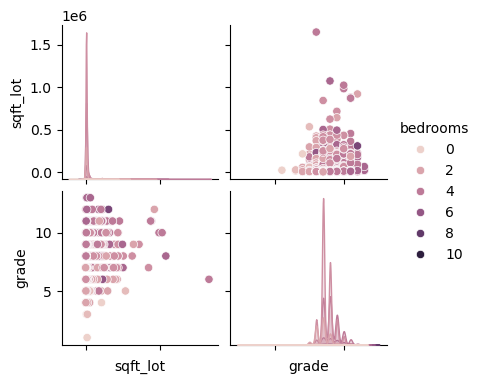

In [35]:
# sqft_lot(부지 평수)','bedrooms(침실 수)','grade(집 등급)' 3개의 상관관계를 나타내기
#1        def pairplot_all(self, cols, h): 
#2        plt.figure(figsize=(10,6))
#3        sns.plotting_context('notebook', font_scale=1.2)
#4        g = sns.pairplot(self.df[cols], hue=h, height=2)
#5        g.set(xticklabels=[])

#3번째 low에 hue=h 를 넣으면 h인 bedrooms 색깔 변경 가능

hsjo.pairplot_all(['sqft_lot','bedrooms','grade'], 'bedrooms')

In [48]:
3개 컬럼의 상관관계를 봤을 때

1. 부지 평수 vs 침실 수 (위에서 오른쪽 그래프)
  : 대부분 부지 평수의 0.0 ~ 0.5 사이에 몰려있고 몇몇 이상치(침실 수에 비해 부지 평수가 많이 큰 경우)를 볼 수 있다
* 두 컬럼의 큰 상관관계는 없음
2. 부지 평수 vs 집 등급 (아래에서 왼쪽 그래프)
  : 부지 평수가 작은 쪽에 집 등급이 골고루 분포하고 있음, 부지 평수가 엄청 크지만 집 등급이 낮은 경우도 볼 수 있다
* 두 컬럼의 큰 상관관계는 없음
3. 침실 수 vs 집 등급 (아래에서 오른쪽 그래프)
  : 집 등급이 높을수록 침실 수가 늘어나는 약간의 경향성은 보이지만 분포가 고르지 않음
* 두 컬럼의 상관관계는 있으나 아주 유효한지는 알 수 없음

SyntaxError: invalid syntax (553469607.py, line 1)

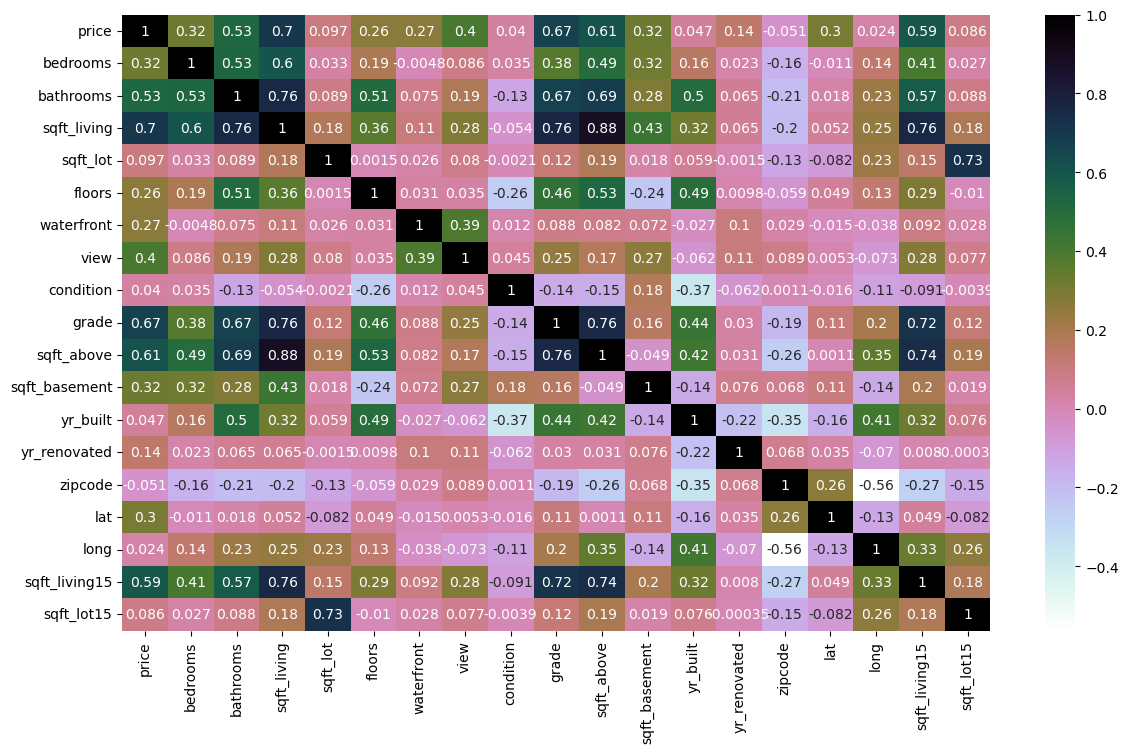

In [36]:
hsjo.heatmap()

In [37]:
각 컬럼의 상관관계를 히트맵으로 봤을 때, price와의 관계율이 높은 몇몇 컬림이 보인다


SyntaxError: invalid syntax (2400624126.py, line 1)

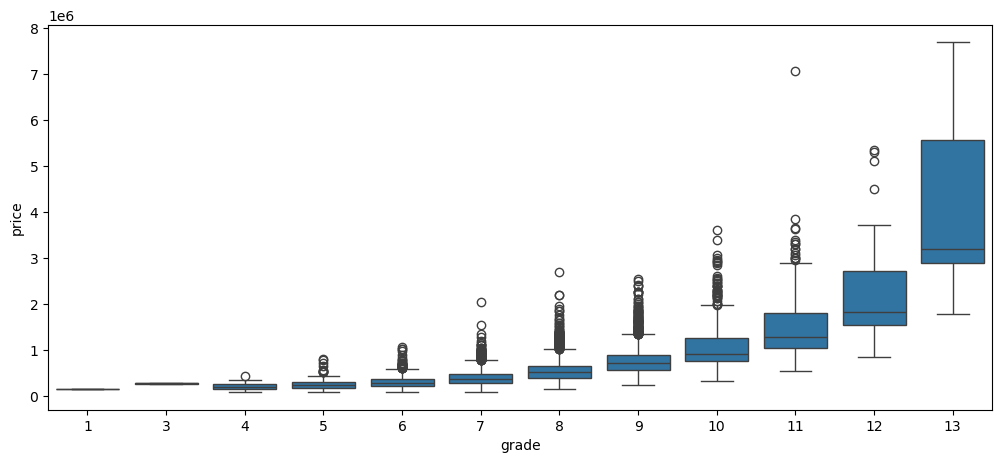

In [38]:
# boxplot은 가격의 최소값, 최대값, 중간값, 이상치(아웃라이어, outlier)을 보여준다
# 집 등급과 가격의 관계

hsjo.boxplot('grade', 'price')

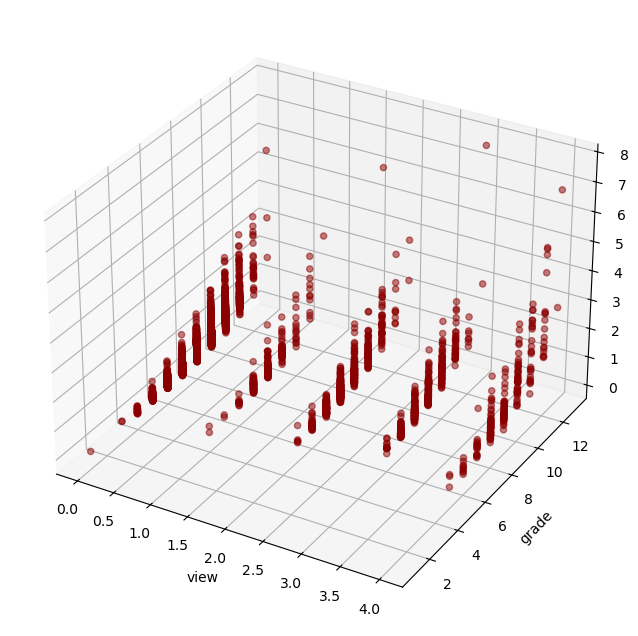

In [39]:
# 뷰, 집 등급, 가격 3개를 3차원으로 비교하기

hsjo.plot_3d('view', 'grade', 'price')

In [ ]:
집 가격 예측하기

In [40]:
# 주택 면적 데이터만 가지고 학습 시키기
# a = train X(학습 데이터) / 전체 train 데이터 중 0.8은 학습 데이터로 구분
# b = train Y(학습 데이터 Price 값)
# c = test  X(테스트 데이터) / 전체 train 데이터 중 0.2를 테스트 데이터로 사용
# d = 공백 / c 를 통해 d를 예측하므로 공백

a, b, c, d = hsjo.prepare_4_data(['sqft_living'], 'price', 0.8)

In [41]:
print(hsjo.df.shape)
print(a.shape, b.shape, c.shape, d.shape)

(15035, 20)
(12028, 1) (12028,) (3007, 1) (3007,)


In [42]:
hsjo.run_linear_reg(a, b, c, d)

[1144855.46106056  296148.38889121  870356.14398928 ...  293347.3754517
  956907.45926992  545438.58500696] 
 (3007,)
0.497


In [43]:
print('실제 정답')
print(d.head(10))

실제 정답
3292     1160000.0
11000     315000.0
6439      850000.0
7299      304950.0
5968      230000.0
3471     1151250.0
13539     492650.0
14893     535000.0
6555      913000.0
7569      812000.0
Name: price, dtype: float64


In [44]:
여러 feature를 추가했을 때 성능이 조금 더 올랐다

SyntaxError: invalid syntax (1377695173.py, line 1)

In [45]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade','yr_built','zipcode']

a, b, c, d = hsjo.prepare_4_data(features, 'price', 0.8)
print(a.shape)
hsjo.run_linear_reg(a, b, c, d)

(12028, 10)
[1112492.38525902  306648.36853421  870467.40821435 ...  560476.94407291
  951772.34071132  672788.31694413] 
 (3007,)
0.658


In [ ]:
선형회귀모델이 아닌 다른 모델로도 적용

In [46]:
# K-NN 알고리즘

features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade','yr_built','zipcode']

a, b, c, d = hsjo.prepare_4_data(features, 'price', 0.8)
print(a.shape)
hsjo.run_kn_reg(a, b, c, d, 10)

(12028, 9)
[1035074.4  352420.   746320.  ...  341195.   887074.6  372945. ] 
 (3007,)
0.583


In [47]:
# 결정트리 알고리즘

features = ['sqft_living', 'floors', 'waterfront', 'view','grade','yr_built','zipcode']
a, b, c, d = hsjo.prepare_4_data(features, 'price', 0.8)
hsjo.run_dt_reg(a, b, c, d)

[1020000.  260000.  716500. ...  640500.  915000.  335000.] 
 (3007,)
0.685


In [48]:
# 랜덤 포레스트 알고리즘

features = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade','yr_built','zipcode']
a, b, c, d = hsjo.prepare_4_data(features, 'price', 0.8)
hsjo.run_rf_reg(a, b, c, d)

[891660.71428571 336377.5        712023.21428571 ... 350821.42857143
 820899.14285714 404258.92857143] 
 (3007,)
0.790


In [83]:
선형회귀모델 외 4가지 모델을 사용했을 때, 랜덤 포레스트 알고리즘 적용 시 정확도가 가장 높았다

SyntaxError: invalid syntax (3789849111.py, line 1)

In [50]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'sqft_above', 'waterfront', 'view', 'grade','yr_built','sqft_living']
a, b, c, d = hsjo.prepare_4_data(features, 'price', 0.8)

judy = RandomForestRegressor(n_estimators=28,random_state=0)
judy.fit(a, b)

score = judy.score(c, d)
print(format(score,'.2f'))

test_df = pd.read_csv('~/work/kaggle_kakr_housing/data/test.csv')
print(test_df.shape)

predicted = judy.predict(test_df[features])
print(predicted.shape)

0.79
(6468, 20)
(6468,)


In [96]:
def create_submission (blank_form, my_result, file):
    sub = pd.read_csv(blank_form)
    #print(sub.shape)
    #print(predicted.shape)
    sub['price'] = predicted 
    sub.to_csv(file, index=False)
    print('Submission file(', file, ') created!')
    
create_submission ('~/work/kaggle_kakr_housing/data/sample_submission.csv', predicted, 'mysubmission.csv')

Submission file( mysubmission.csv ) created!


In [ ]:
해당 방법으로 진행했으나 캐글 score는 15만점으로 나와 모델 블렌딩이 필요하다고 판단

In [51]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

In [53]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

In [54]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)


In [55]:
def AveragingBlending(models, x, y, sub_x):
    for m in models :
        m['model'].fit(x.values, y)

    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)


In [58]:
features = [ 'sqft_living','bedrooms','bathrooms','sqft_lot',
             'sqft_living15','waterfront','view','grade' ]

# 2) train/test 분리
x, y, sub, test_y = hsjo.prepare_4_data(features, 'price', 0.8)

# 3) 모델 리스트 준비 (이미 정의돼 있다고 가정)
# models = [ {'model':gboost,'name':'GB'}, ... ]

# 4) Blending 호출
y_pred = AveragingBlending(models, x, y, sub)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 8
[LightGBM] [Info] Start training from score 540221.872132


In [59]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 8
[LightGBM] [Info] Start training from score 540221.872132
3007


array([ 970158.05975223,  306732.67390053,  653781.05695635, ...,
        388541.50741859, 1037034.66487553,  553962.02293026],
      shape=(3007,))

In [62]:
data_dir = '~/work/kaggle_kakr_housing/data/'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [81]:
result = pd.DataFrame({
    'id' : sub_id,
    'price' : y_pred
})

result.head()

ValueError: array length 3007 does not match index length 6468

In [65]:
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

~/work/kaggle_kakr_housing/data/submission.csv
